# _TEMA 9. ANALISIS DE COMPONENTES PRINCIPALES_

In [20]:
#Importando librerias necesarias
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import scipy.stats as stats #Para calculo de probabilidades

from sklearn.model_selection import train_test_split #Particionamiento
from sklearn.preprocessing import MinMaxScaler #Utilizar la normalizacion
from sklearn.preprocessing import StandardScaler #Utilizar la estandarizacion 
from sklearn.decomposition import PCA #Para la descomposicion de la varianza en el PCA

In [2]:
#Estableciendo nuestro directorio de trabajo
os.chdir("D:\Social Data Consulting\Python for Data Science\data")

In [3]:
miarchivo="data_credit.csv"
df=pd.read_csv(miarchivo,sep=",", encoding='ISO-8859-1')
df.head()

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab,customer
0,6.0,5.0,4.0,1169.0,0.0,4.0,4.0,3.0,4.0,1.0,67.0,2.0,2.0,3.0,1.0,1.0
1,48.0,3.0,4.0,5951.0,1.0,2.0,2.0,2.0,2.0,1.0,22.0,2.0,1.0,3.0,1.0,2.0
2,12.0,5.0,7.0,2096.0,1.0,3.0,2.0,3.0,3.0,1.0,49.0,2.0,1.0,2.0,2.0,1.0
3,42.0,3.0,3.0,7882.0,1.0,3.0,2.0,3.0,4.0,2.0,45.0,3.0,1.0,3.0,2.0,1.0
4,24.0,4.0,1.0,4870.0,1.0,2.0,3.0,3.0,4.0,4.0,53.0,3.0,2.0,3.0,2.0,2.0


In [7]:
#Estableciendo nuestra matriz de datos X y la target Y
x=df.iloc[:,0:len(df.columns)-1].values
y=df.iloc[:,len(df.columns)-1].values

#Particionando los datos
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

**_Escalamiento de Variables_**

**_Normalizacion (X - Xmin)/(Xmax - Xmin)_**

In [10]:
#Instanciando un objeto de la clase MinMaxScaler
mms=MinMaxScaler()
#Aprendiendo y transformando 
xtrain=mms.fit_transform(xtrain)

**_Estandarizacion (X - Xmean)/(DesvX)_**

In [11]:
#Instanciando un objeto de la clase StandardScaler
sc=StandardScaler()
#Aprendiendo y transformando 
xtrain_std=sc.fit_transform(xtrain)

In [12]:
#Ojo: Con lo aprendido de xtrain se debe realizar la transformacion para el Xtest
xtest_std=sc.transform(xtest)

In [15]:
#Creando un nuevo dataframe con los datos estandarizados
df_std=pd.DataFrame(xtrain_std,columns=['duration','chist','reason','camt','telephne','lenemp',
                                        'instrate','perstat','residlen','prpownr','age','housng','numcred',
                                        'emptype','numliab'])
df_std.head()

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab
0,0.273431,1.377803,-0.744406,-0.277224,-1.199593,0.228874,0.933475,1.851752,0.121235,-0.339904,-0.769416,0.132827,0.986832,0.147072,-0.445679
1,-0.241782,1.377803,-0.744406,0.276215,-1.199593,1.063310,-1.759240,-0.997097,1.033756,-1.287844,-0.250958,-1.726746,2.679927,0.147072,-0.445679
2,0.273431,-0.502240,-0.276016,1.658889,-1.199593,-1.439999,-1.759240,-0.997097,-0.791286,-0.339904,-0.510187,0.132827,-0.706262,0.147072,-0.445679
3,0.273431,-2.382283,1.363351,0.377476,-1.199593,-0.605562,-1.759240,0.427327,1.033756,-1.287844,0.008271,0.132827,2.679927,-1.366903,-0.445679
4,0.273431,-0.502240,-0.744406,-0.641395,-1.199593,-1.439999,0.933475,1.851752,0.121235,-1.287844,-0.250958,0.132827,-0.706262,0.147072,-0.445679


In [16]:
#columnas=list(df.columns)
#columnas=columnas.pop()

# Realizamos la Prueba de Esfericidad de Bartlett

In [17]:
n=df_std.shape[0]
p=df_std.shape[1]

In [18]:
df_corr=df_std.corr(method='pearson')
df_corr

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab
duration,1.000000,-0.076000,0.171482,0.615645,-0.180049,0.099967,0.106123,0.003897,0.041850,0.314577,-0.018861,0.153928,-0.007308,0.252479,0.001114
chist,-0.076000,1.000000,-0.086105,-0.060558,-0.020915,0.130637,0.019237,0.048204,0.013098,-0.063783,0.154075,0.081694,0.436512,0.025071,0.028976
reason,0.171482,-0.086105,1.000000,0.141879,-0.116151,0.024089,0.023723,-0.007387,0.006902,0.055240,0.037755,0.094522,0.074690,0.034516,0.009255
camt,0.615645,-0.060558,0.141879,1.000000,-0.301887,0.088360,-0.279371,-0.026608,0.027859,0.300961,0.050640,0.126361,0.038134,0.282926,0.044728
telephne,-0.180049,-0.020915,-0.116151,-0.301887,1.000000,-0.137472,-0.006466,0.007861,-0.087811,-0.192984,-0.125610,-0.126930,-0.065308,-0.373257,-0.019061
lenemp,0.099967,0.130637,0.024089,0.088360,-0.137472,1.000000,0.052770,0.060109,0.295321,0.181755,0.359757,0.215654,0.115225,0.139594,0.050709
instrate,0.106123,0.019237,0.023723,-0.279371,-0.006466,0.052770,1.000000,0.149039,0.058831,0.015850,0.040698,0.052457,0.044896,0.113138,-0.059866
perstat,0.003897,0.048204,-0.007387,-0.026608,0.007861,0.060109,0.149039,1.000000,0.005756,-0.010995,0.000158,0.105953,0.060637,-0.010475,0.113833
residlen,0.041850,0.013098,0.006902,0.027859,-0.087811,0.295321,0.058831,0.005756,1.000000,0.131417,0.265400,0.054197,0.061345,-0.011909,0.061044
prpownr,0.314577,-0.063783,0.055240,0.300961,-0.192984,0.181755,0.015850,-0.010995,0.131417,1.000000,0.058511,0.354891,-0.019954,0.277565,0.026972


In [22]:
chi2 = -(n-1-(2*p+5)/6)*math.log(np.linalg.det(df_corr))
chi2

1570.825700088016

In [23]:
gl=p*(p-1)/2
gl

105.0

In [24]:
pvalue=stats.chi2.pdf(chi2,gl)
pvalue

4.450897368743657e-260

**_El p-value es menor al 0.05 por lo que rechazo H0 , por lo tanto las variables estan correlacionadas_**

## **_Determinacion del numero de PCs_**

In [26]:
#Construyendo la matriz varianza-covarianza
cov_mat=np.cov(xtrain_std.T) #T es la transpuesta


In [27]:
autovalores, autovectores= np.linalg.eig(cov_mat)
print(autovalores)

[2.60578196 1.85372185 0.25381197 1.29084417 1.23590266 1.13647209
 1.02547872 0.94670645 0.92180491 0.81141704 0.73721234 0.65968383
 0.46793695 0.52060445 0.55407982]


In [28]:
(autovalores>1).sum()

6

In [38]:
print(sorted(autovalores, reverse=True)) #Para ordenar de mayor a menor

[2.6057819591643065, 1.8537218450626183, 1.2908441727878959, 1.2359026613221862, 1.1364720923711211, 1.0254787172833246, 0.9467064549049782, 0.9218049121494087, 0.8114170423145851, 0.7372123412746207, 0.6596838329100336, 0.5540798228410407, 0.5206044520296951, 0.4679369496192144, 0.25381197143276457]


In [30]:
#Variabilidad PC1
cp1=round(autovalores[0]*100/sum(autovalores),2)
cp1

17.35

**_Varianza Total y Explicada_**

In [32]:
#Instanciando un objeto de la clase PCA
pca=PCA() #Tantos PCA como variables originales
xtrain_pca=pca.fit_transform(xtrain_std)

In [33]:
varianzaexplicada=pca.explained_variance_ratio_
varianzaexplicada

array([0.17347063, 0.12340491, 0.08593334, 0.08227581, 0.07565657,
       0.06826758, 0.0630236 , 0.06136587, 0.05401719, 0.04907728,
       0.0439161 , 0.03688589, 0.03465738, 0.03115123, 0.01689663])

In [34]:
varianzaacumulada=np.cumsum(varianzaexplicada)
varianzaacumulada

array([0.17347063, 0.29687554, 0.38280888, 0.46508469, 0.54074126,
       0.60900884, 0.67203244, 0.73339831, 0.7874155 , 0.83649278,
       0.88040888, 0.91729476, 0.95195214, 0.98310337, 1.        ])

**_Grafico de Sedimentacion_**

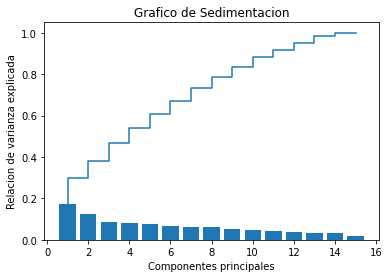

In [36]:
plt.bar(range(1,len(df_std.columns)+1),varianzaexplicada)
plt.step(range(1,len(df_std.columns)+1),varianzaacumulada)
plt.ylabel('Relacion de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Grafico de Sedimentacion')
plt.show()

## **_Generacion de Componentes Principales Scores_**

In [37]:
pca=PCA(n_components=6)
x6comp=pca.fit_transform(xtrain_std)
print(x6comp)

[[ 0.35795795  1.10780385 -0.89486923 -2.10952592  0.1728588  -0.55375747]
 [-0.03613045  1.37438029 -3.01414447  1.10505702 -2.31343319  0.41893548]
 [ 0.23539438 -2.47863684 -1.24410155  1.2967285  -0.4498906  -0.67519729]
 ...
 [-0.26722313  1.55996284 -1.11611171 -1.03340679 -1.49747433  0.28789643]
 [ 0.26367733  0.58187419 -0.58542376 -1.18396572 -0.7085735   0.23943327]
 [ 0.07236464  0.70268548  0.18042947 -1.17604042 -0.3782888   0.55785812]]


In [39]:
df_x=pd.DataFrame(x6comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_x['Customer']=ytrain
df_x.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,Customer
0,0.357958,1.107804,-0.894869,-2.109526,0.172859,-0.553757,1.0
1,-0.036130,1.374380,-3.014144,1.105057,-2.313433,0.418935,2.0
2,0.235394,-2.478637,-1.244102,1.296728,-0.449891,-0.675197,1.0
3,0.071459,-0.197860,-1.056150,1.563974,0.717678,2.345540,2.0
4,-0.765311,-0.414793,0.667308,-1.717680,0.566614,-0.350221,1.0
5,0.697097,-0.596313,2.116030,-0.464408,0.083032,0.387817,2.0
6,-0.488380,1.573986,-0.216953,-0.525241,-1.227563,-0.261965,1.0
7,-0.444082,-1.067414,1.180356,-0.938877,-0.241765,0.542838,1.0
8,2.047943,0.365126,2.088276,-0.651831,-0.242252,-0.788406,1.0
9,-2.583473,-0.380457,0.404785,0.411982,-0.091772,0.307833,2.0


# **_TEMA 10. ANALISIS FACTORIAL_**

Trata de detectar si hay variables latentes no observadas que explican el comportamiento de los datos por detras, 
la diferencia con el analisis de componentes es que en el analisis factorial existe un modelo por detras

In [40]:
from sklearn.decomposition import FactorAnalysis

In [41]:
#Cargando la data y colocando el  nombre de las columnas 
miArchivo="wine.data"
df_wine=pd.read_csv(miArchivo,header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
#Estableciendo nuestra matriz de datos X y target Y
x=df_wine.iloc[:,1:].values
y=df_wine.iloc[:,0].values

#Dividir o particionar los datos
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)


In [46]:
#Escalamiento de las Variables
sc=StandardScaler()
xtrain_std=sc.fit_transform(xtrain)
xtest_std=sc.transform(xtest)

In [49]:
FA=FactorAnalysis()
xtrainFA=FA.fit(xtrain_std)

In [50]:
xtrainFA.components_

array([[-2.68398795e-01,  4.78267922e-01, -8.23434764e-02,
         3.89619362e-01, -2.80493395e-01, -8.48027518e-01,
        -8.96695560e-01,  6.10593544e-01, -6.34124632e-01,
         1.77666823e-01, -6.72551278e-01, -7.98880917e-01,
        -5.95473936e-01],
       [ 7.01476029e-01,  1.78412796e-01,  2.63041773e-01,
        -2.28848343e-01,  3.51196978e-01,  7.72534972e-02,
        -1.90598515e-02,  1.00562271e-01,  2.22408351e-02,
         7.52555988e-01, -2.59878489e-01, -3.41463147e-01,
         5.52834465e-01],
       [-7.61801772e-02,  1.62225043e-01,  6.55477450e-01,
         6.00167810e-01,  1.51567033e-01,  1.33712377e-01,
         9.11337260e-02,  1.81671002e-01,  2.64162505e-02,
         2.06370030e-02, -3.92249922e-02,  7.33103165e-02,
        -6.73110647e-02],
       [-4.73323851e-02,  2.70658477e-01, -1.34998350e-01,
        -1.92209263e-02, -1.63701363e-01,  1.18296185e-01,
         7.84306206e-02, -4.09230845e-02,  2.85458651e-01,
         1.14959202e-01, -2.98859200e

In [51]:
FA=FactorAnalysis(n_components=6, 
                  random_state=2020)
xtrain_F6=FA.fit_transform(xtrain_std)
xtrain_F6=pd.DataFrame(xtrain_F6, columns=['F1','F2','F3','F4','F5','F6'])
xtrain_F6.head()

,F1,F2,F3,F4,F5,F6
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941


## Trabajando con Factor_Analyzer

In [53]:
#pip install factor_analyzer

In [54]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [55]:
#Importando un archivo de trabajo 
miarchivo="nba_logreg2.csv"
df_nba=pd.read_csv(miarchivo, sep=';')
df_nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [56]:
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [57]:
#Cambiando el tipo de variable para el dtarget
df_nba['TARGET_5Yrs']=df_nba['TARGET_5Yrs'].astype("int64")

In [58]:
df_nba.columns

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [69]:
variables= ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV']

In [70]:
x=df_nba.loc[:,variables]
y=df_nba['TARGET_5Yrs']

#Dividir o particionar los datos
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)


In [71]:
#Escalamiento de las Variables
sc=StandardScaler()
xtrain_std=sc.fit_transform(xtrain)
xtest_std=sc.transform(xtest)

In [72]:
df_xtrain_std=pd.DataFrame(xtrain_std,columns=variables)
df_xtrain_std.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-0.719662,-0.995681,-1.118599,-1.139285,-0.943118,-2.419002,-0.652122,-0.739133,-1.194836,-0.808896,-0.772801,-1.065002,-0.408200,-0.463069,-0.458849,-0.941404,-1.035153,0.068181,-0.983208
1,-2.848945,-0.842179,-1.005949,-0.906612,-1.134714,2.561225,-0.652122,-0.739133,-1.194836,-1.112395,-0.999118,-3.511972,0.590160,-0.177347,0.153456,-0.802534,-0.556797,0.068181,-0.842078
2,0.143561,-0.440712,-0.487761,-0.441266,-0.477813,0.394503,-0.652122,-0.739133,-1.194836,-0.404230,-0.320169,-0.769842,0.590160,0.108375,0.247657,-0.802534,-0.556797,0.068181,-0.136426
3,-0.489469,-0.606022,-0.915829,-0.906612,-1.079972,1.494033,-0.652122,-0.739133,-1.194836,-0.606563,-0.471046,-0.998353,1.214134,0.036944,0.483159,-0.802534,-0.795975,-0.608780,-1.124338
4,-0.662114,-1.007489,-1.118599,-1.139285,-1.079972,-1.853067,-0.390259,-0.176618,0.133145,-0.808896,-0.772801,-0.503246,-1.032175,-0.963083,-1.071154,0.100121,-0.317618,-0.608780,-0.842078


In [73]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_xtrain_std)
chi_square_value,p_value

(37755.91180622378, 0.0)

In [74]:
kmo_all,kmo_model=calculate_kmo(df_xtrain_std)
kmo_model

D:\Anaconda\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8319674408090705

In [75]:
#Instanciamos un objeto de la clase FactorAnalyzer
fa=FactorAnalyzer()

In [78]:
#Aprendiendo de los datos
fa.fit(df_xtrain_std)

FactorAnalyzer(rotation_kwargs={})

In [79]:
ev,v=fa.get_eigenvalues()
ev.round(2)

array([9.62, 3.88, 1.15, 0.88, 0.74, 0.57, 0.5 , 0.46, 0.42, 0.25, 0.24,
       0.11, 0.1 , 0.05, 0.01, 0.01, 0.  , 0.  , 0.  ])

In [80]:
fa3=FactorAnalyzer(n_factors=3, rotation='varimax')
fa3.fit(df_xtrain_std)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [81]:
fa3.loadings_ #Obtengo mi matriz de carga

array([[ 0.50273011,  0.31114658,  0.01354104],
       [ 0.7589412 ,  0.52820124,  0.26674508],
       [ 0.78720073,  0.53164499,  0.21819037],
       [ 0.7666778 ,  0.54511982,  0.16768926],
       [ 0.79042323,  0.45405311,  0.28090947],
       [ 0.08350769,  0.47272895, -0.3524417 ],
       [ 0.21368394, -0.02511964,  0.94890956],
       [ 0.24127587, -0.05083696,  0.95533478],
       [ 0.14513081, -0.22800746,  0.57850748],
       [ 0.75143107,  0.49411374,  0.04044473],
       [ 0.70952   ,  0.56606201, -0.02345885],
       [ 0.32146327, -0.13280663,  0.268352  ],
       [ 0.245135  ,  0.86120925, -0.25058736],
       [ 0.35628805,  0.87221386, -0.01633978],
       [ 0.31773141,  0.92471966, -0.10119401],
       [ 0.78495845, -0.14909171,  0.24470341],
       [ 0.75928788,  0.15273428,  0.18826175],
       [ 0.11247855,  0.70110513, -0.17194604],
       [ 0.88510287,  0.28535419,  0.10864593]])

In [82]:
#Comunalidades ---Mcarga*McargaT 
#explicada por los factores comunes
fa3.get_communalities()

array([0.34973312, 0.92614124, 0.94993843, 0.91307016, 0.90984324,
       0.35466135, 0.94672117, 0.97346298, 0.40772125, 0.81043282,
       0.82439515, 0.19298903, 0.86456657, 0.88796518, 0.96629993,
       0.69826786, 0.63528833, 0.53376527, 0.87663805])

In [83]:
#Especificidades 
fa3.get_uniquenesses()

array([0.65026688, 0.07385876, 0.05006157, 0.08692984, 0.09015676,
       0.64533865, 0.05327883, 0.02653702, 0.59227875, 0.18956718,
       0.17560485, 0.80701097, 0.13543343, 0.11203482, 0.03370007,
       0.30173214, 0.36471167, 0.46623473, 0.12336195])

In [ ]:
# Las comuninalidades + especificidades deben sumar 1 